# Understanding Trends of Crimes in New York City
Group Members: Yichao Cui(yc793), Jingjing Ye (jy645)

**Dataset:** NYPD Complaint Data Historic (https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i). This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of last year (2021). The dataset has more than 7 million records and 35 attributes. Each of which corresponds to a feature related to crime, such as description of offense, level of office, suspect and victim’s age group, race, gender, etc.. 

**Questions We Try to Answer:**
 <br>1) After the COVID-19 outbreak, has there been a significant increase in crimes in New York City? <br>
2) Where are dangerous areas for certain population? 

**Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/NYPD_Complaint_Data_Historic.csv')

# Show columns of our dataset
df.head()

Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,506547392,03/29/2018,20:30:00,NaN,NaN,32.0,03/30/2018,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,NaN,NaN,40.810877,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,NaN,25-44,WHITE,F
1,629632833,02/06/2018,23:15:00,NaN,NaN,52.0,02/07/2018,341,PETIT LARCENY,333.0,...,F,NaN,40.873671,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D
2,787203902,11/21/2018,00:15:00,11/21/2018,00:20:00,75.0,11/21/2018,341,PETIT LARCENY,321.0,...,F,NaN,40.651782,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,D
3,280364018,06/09/2018,21:42:00,06/09/2018,21:43:00,10.0,06/10/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.759310,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE HISPANIC,F
4,985800320,11/10/2018,19:40:00,11/10/2018,19:45:00,19.0,11/10/2018,341,PETIT LARCENY,333.0,...,F,NaN,40.764536,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D


In [ ]:
# Check the size of original dataset
df.shape

(7825499, 35)

In [ ]:
# Check the percentage of missing values for each column to determine which columns to discard
null_df = (df.isnull().sum() / len(df)) * 100
null_df

CMPLNT_NUM            0.000000
CMPLNT_FR_DT          0.008370
CMPLNT_FR_TM          0.000613
CMPLNT_TO_DT         22.289876
CMPLNT_TO_TM         22.228346
ADDR_PCT_CD           0.027679
RPT_DT                0.000000
KY_CD                 0.000000
OFNS_DESC             0.240649
PD_CD                 0.086397
PD_DESC               0.086397
CRM_ATPT_CPTD_CD      0.002147
LAW_CAT_CD            0.000000
BORO_NM               0.159479
LOC_OF_OCCUR_DESC    20.676803
PREM_TYP_DESC         0.536899
JURIS_DESC            0.000000
JURISDICTION_CODE     0.086397
PARKS_NM             99.605712
HADEVELOPT           95.548028
HOUSING_PSA          92.341792
X_COORD_CD            0.221571
Y_COORD_CD            0.221571
SUSP_AGE_GROUP       62.403292
SUSP_RACE            44.915065
SUSP_SEX             46.618650
TRANSIT_DISTRICT     97.795987
Latitude              0.221571
Longitude             0.221571
Lat_Lon               0.221571
PATROL_BORO           0.092237
STATION_NAME         97.795987
VIC_AGE_

In [ ]:
# Drop columns that are: 1) not important to our analysis; 2) have >95% missing data; 3) not important to our analysis (information such as the transit district or patrol borough
df.drop(['CMPLNT_TO_DT','CMPLNT_TO_TM','JURIS_DESC','PARKS_NM','HADEVELOPT','HOUSING_PSA','TRANSIT_DISTRICT','STATION_NAME'], axis='columns', inplace=True)

In [ ]:
# Drop rows that have missing values
df.dropna(subset=['CMPLNT_FR_DT','CRM_ATPT_CPTD_CD','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','Lat_Lon','BORO_NM','OFNS_DESC'], inplace=True)

In [ ]:
# Since some of the missing values from the dataset are entered as "UNKNOWN", while others are entered as "NaN", we decided to replace all of them as "NaN" for columns that are important to our analysis
df.replace('UNKNOWN', np.NaN)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,...,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,506547392,03/29/2018,20:30:00,32.0,03/30/2018,351,CRIMINAL MISCHIEF & RELATED OF,254.0,"MISCHIEF, CRIMINAL 4, OF MOTOR",COMPLETED,...,NaN,NaN,NaN,40.810877,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,25-44,WHITE,F
1,629632833,02/06/2018,23:15:00,52.0,02/07/2018,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,...,45-64,BLACK,F,40.873671,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,NaN,NaN,D
2,787203902,11/21/2018,00:15:00,75.0,11/21/2018,341,PETIT LARCENY,321.0,"LARCENY,PETIT FROM AUTO",COMPLETED,...,25-44,WHITE HISPANIC,F,40.651782,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,NaN,NaN,D
3,280364018,06/09/2018,21:42:00,10.0,06/10/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,...,25-44,WHITE HISPANIC,M,40.759310,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,18-24,WHITE HISPANIC,F
4,985800320,11/10/2018,19:40:00,19.0,11/10/2018,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,...,<18,BLACK HISPANIC,F,40.764536,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,NaN,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825494,104527061,05/01/2008,18:55:00,10.0,05/01/2018,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",COMPLETED,...,45-64,WHITE HISPANIC,F,40.756788,-73.996540,"(40.756788048, -73.996539912)",PATROL BORO MAN SOUTH,NaN,NaN,E
7825495,284201488,05/18/2018,14:50:00,122.0,05/22/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,...,<18,BLACK,M,40.577953,-74.102317,"(40.577953265, -74.102316756)",PATROL BORO STATEN ISLAND,<18,WHITE HISPANIC,M
7825496,808565901,11/19/2018,02:25:00,110.0,11/19/2018,109,GRAND LARCENY,421.0,"LARCENY,GRAND FROM VEHICLE/MOTORCYCLE",COMPLETED,...,NaN,WHITE,M,40.743188,-73.862427,"(40.743188053, -73.862427079)",PATROL BORO QUEENS NORTH,25-44,ASIAN / PACIFIC ISLANDER,M
7825497,649441648,02/03/2018,10:02:00,122.0,02/03/2018,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,...,45-64,WHITE,F,40.593665,-74.089000,"(40.593664627, -74.089000194)",PATROL BORO STATEN ISLAND,45-64,WHITE,M


In [ ]:
df.shape

(7776691, 27)

In [ ]:
# Since we are going to explore victims' age, race, sex, and crime's time, we decide to drop rows that have missing values in any of these columns
df = df.dropna(subset=['VIC_AGE_GROUP'])
df = df.dropna(subset=['VIC_RACE'])
df = df.dropna(subset=['VIC_SEX'])
df = df.dropna(subset=['CMPLNT_FR_TM'])
df = df.dropna(subset=['Longitude'])
df = df.dropna(subset=['Latitude'])
df = df.dropna(subset=['BORO_NM'])
df = df[df['VIC_AGE_GROUP'] != 'UNKNOWN']
df = df[df['VIC_RACE'] != 'UNKNOWN']
df = df[df['VIC_SEX'] != 'UNKNOWN']
df = df[df['CMPLNT_FR_TM'] != 'UNKNOWN']
df = df[df['Longitude'] != 'UNKNOWN']
df = df[df['Latitude'] != 'UNKNOWN']
df = df[df['BORO_NM'] != 'UNKNOWN']

In [ ]:
# Check unique values in the age group ('VIC_AGE_GROUP')
df['VIC_AGE_GROUP'].astype(dtype = str, errors = 'ignore').astype(dtype = int, errors = 'ignore')
df['VIC_AGE_GROUP'].value_counts(normalize=True)

25-44    4.827205e-01
45-64    2.522950e-01
18-24    1.468632e-01
<18      6.560065e-02
65+      5.243610e-02
             ...     
-70      1.948312e-07
-902     1.948312e-07
-45      1.948312e-07
-53      1.948312e-07
965      1.948312e-07
Name: VIC_AGE_GROUP, Length: 197, dtype: float64

In [ ]:
# Drop rows that contain outliers in the age group ('VIC_AGE_GROUP')
df = df[(df['VIC_AGE_GROUP'].values  == '<18')|(df['VIC_AGE_GROUP'].values  == '18-24')|(df['VIC_AGE_GROUP'].values  == '25-44')|(df['VIC_AGE_GROUP'].values  == '45-64')|(df['VIC_AGE_GROUP'].values  == '65+')]

In [ ]:
# Check unique values in the race group ('VIC_RACE')
df['VIC_RACE'].astype(dtype = str, errors = 'ignore')
df['VIC_RACE'].value_counts(normalize=True)

BLACK                             0.358437
WHITE                             0.252726
WHITE HISPANIC                    0.242504
ASIAN / PACIFIC ISLANDER          0.088240
BLACK HISPANIC                    0.051459
AMERICAN INDIAN/ALASKAN NATIVE    0.006629
OTHER                             0.000006
Name: VIC_RACE, dtype: float64

In [ ]:
# Check unique values in the gender group ('VIC_SEX')
df['VIC_SEX'].astype(dtype = str, errors = 'ignore')
df['VIC_SEX'].value_counts(normalize=True)

F    0.545449
M    0.454276
D    0.000243
E    0.000033
Name: VIC_SEX, dtype: float64

In [ ]:
# Drop rows that contain outliers in the gender group ('VIC_SEX')
df_new = df.drop(df[(df['VIC_SEX'] != 'F') & (df['VIC_SEX'] != 'M')].index)

In [ ]:
# Check unique values in the gender group ('VIC_SEX')
df_new['CMPLNT_FR_TM'].astype(dtype = str, errors = 'ignore')
df_new['CMPLNT_FR_TM'].value_counts(normalize=True)

12:00:00    0.031136
15:00:00    0.025120
18:00:00    0.024304
20:00:00    0.023516
17:00:00    0.022225
              ...   
06:31:00    0.000025
04:31:00    0.000024
06:16:00    0.000023
05:51:00    0.000021
05:31:00    0.000019
Name: CMPLNT_FR_TM, Length: 1440, dtype: float64

In [ ]:
# Select certain features that matter to our study
df_new = df_new[['CMPLNT_FR_DT','CMPLNT_FR_TM','LAW_CAT_CD','BORO_NM','Latitude','Longitude','VIC_AGE_GROUP','VIC_RACE','VIC_SEX']].copy()

In [ ]:
# Since names of features are hard to interpret, we change the names of features
df_new.rename(columns = {'CMPLNT_FR_DT':'Date of Occurence', 'CMPLNT_FR_TM':'Time of Occurence', 'LAW_CAT_CD':'Level of Offense', 'BORO_NM': 'Borough Name','VIC_AGE_GROUP':'Victim Age', 'VIC_RACE': 'Victim Race', 'VIC_SEX': 'Victim Sex'}, inplace = True)

In [ ]:
# Create a new 'year' column in the dataframe to help with data visualization. Original 'RPT_DT' (Date event was reported to police) column is of type series, so it's hard to manipulate
df_new['Year'] = df_new['Date of Occurence'].str.findall(r'(\d{4})').apply(lambda x: x[0])
df_new['Hour'] = df_new['Time of Occurence'].str.findall('(\d{2})').apply(lambda x: x[0])
df_filtered_year = df_new[(df_new['Year'] >= '2016') & (df_new['Year'] < '2022')]

In [ ]:
# Check unique values and their counts in 'Level of Offense'
df_offense = df_new['Level of Offense'].value_counts()
df_offense

MISDEMEANOR    2539824
FELONY         1667043
VIOLATION       923934
Name: Level of Offense, dtype: int64

In [ ]:
# Check unique values and their counts in 'Victim Age'
df_age = df_new['Victim Age'].value_counts()
df_age

25-44    2476990
45-64    1294658
18-24     753359
<18       336693
65+       269101
Name: Victim Age, dtype: int64

In [ ]:
# Check unique values and their counts in 'Victim Race'
df_race = df_new['Victim Race'].value_counts()
df_race

BLACK                             1839120
WHITE                             1296744
WHITE HISPANIC                    1244179
ASIAN / PACIFIC ISLANDER           452666
BLACK HISPANIC                     264058
AMERICAN INDIAN/ALASKAN NATIVE      34005
OTHER                                  29
Name: Victim Race, dtype: int64

In [ ]:
# Check unique values and their counts in 'Victim Sex'
df_sex = df_new['Victim Sex'].value_counts()
df_sex

F    2799362
M    2331439
Name: Victim Sex, dtype: int64

In [ ]:
df_new

,Date of Occurence,Time of Occurence,Level of Offense,Borough Name,Latitude,Longitude,Victim Age,Victim Race,Victim Sex
0,03/29/2018,20:30:00,MISDEMEANOR,MANHATTAN,40.810877,-73.941064,25-44,WHITE,F
3,06/09/2018,21:42:00,MISDEMEANOR,MANHATTAN,40.759310,-73.994706,18-24,WHITE HISPANIC,F
8,01/16/2018,14:30:00,MISDEMEANOR,BROOKLYN,40.635516,-73.913278,<18,BLACK,M
9,08/04/2018,22:15:00,MISDEMEANOR,BRONX,40.826170,-73.916831,25-44,WHITE HISPANIC,F
10,09/26/2018,18:20:00,FELONY,MANHATTAN,40.803905,-73.952037,25-44,BLACK,M
...,...,...,...,...,...,...,...,...,...
7825493,10/30/2018,15:30:00,FELONY,BRONX,40.856692,-73.908102,45-64,WHITE HISPANIC,M
7825495,05/18/2018,14:50:00,MISDEMEANOR,STATEN ISLAND,40.577953,-74.102317,<18,WHITE HISPANIC,M
7825496,11/19/2018,02:25:00,FELONY,QUEENS,40.743188,-73.862427,25-44,ASIAN / PACIFIC ISLANDER,M
7825497,02/03/2018,10:02:00,VIOLATION,STATEN ISLAND,40.593665,-74.089000,45-64,WHITE,M


In [ ]:
# Convert categorical variable into dummy/indicator variables for all four input variables

dummies = df_new['Level of Offense'].str.get_dummies()
ndf = pd.concat([df_new.drop(['Level of Offense'],1),dummies],1)

<ipython-input-10-28312ae74435>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ndf = pd.concat([df_new.drop(['Level of Offense'],1),dummies],1)
<ipython-input-10-28312ae74435>:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ndf = pd.concat([df_new.drop(['Level of Offense'],1),dummies],1)


In [ ]:
dummies2 = df_new['Victim Age'].str.get_dummies()
ndf = pd.concat([ndf.drop(['Victim Age'],1),dummies2],1)

<ipython-input-11-d352f05025b6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ndf = pd.concat([ndf.drop(['Victim Age'],1),dummies2],1)
<ipython-input-11-d352f05025b6>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ndf = pd.concat([ndf.drop(['Victim Age'],1),dummies2],1)


In [ ]:
dummies3 = df_new['Victim Race'].str.get_dummies()
ndf = pd.concat([ndf.drop(['Victim Race'],1),dummies3],1)

<ipython-input-12-5457f3673b7c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ndf = pd.concat([ndf.drop(['Victim Race'],1),dummies3],1)
<ipython-input-12-5457f3673b7c>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ndf = pd.concat([ndf.drop(['Victim Race'],1),dummies3],1)


In [ ]:
dummies4 = df_new['Victim Sex'].str.get_dummies()
ndf = pd.concat([ndf.drop(['Victim Sex'],1),dummies4],1)

<ipython-input-13-b0bb12b8314e>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ndf = pd.concat([ndf.drop(['Victim Sex'],1),dummies4],1)
<ipython-input-13-b0bb12b8314e>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ndf = pd.concat([ndf.drop(['Victim Sex'],1),dummies4],1)


In [ ]:
ndf

,Date of Occurence,Time of Occurence,Borough Name,Latitude,Longitude,FELONY,MISDEMEANOR,VIOLATION,18-24,25-44,...,<18,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,OTHER,WHITE,WHITE HISPANIC,F,M
0,03/29/2018,20:30:00,MANHATTAN,40.810877,-73.941064,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,06/09/2018,21:42:00,MANHATTAN,40.759310,-73.994706,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
8,01/16/2018,14:30:00,BROOKLYN,40.635516,-73.913278,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
9,08/04/2018,22:15:00,BRONX,40.826170,-73.916831,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
10,09/26/2018,18:20:00,MANHATTAN,40.803905,-73.952037,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825493,10/30/2018,15:30:00,BRONX,40.856692,-73.908102,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7825495,05/18/2018,14:50:00,STATEN ISLAND,40.577953,-74.102317,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
7825496,11/19/2018,02:25:00,QUEENS,40.743188,-73.862427,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
7825497,02/03/2018,10:02:00,STATEN ISLAND,40.593665,-74.089000,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


**Data Visualization**

In [ ]:
# Plot the number of total crimes against year
df_filtered_year['Year'].value_counts().sort_index(ascending=True).plot(kind="line", title = "Total Crime Events by Year")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot borough and victim age
boro_order = ['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS', 'STATEN ISLAND']
sns.catplot(x='Borough Name', kind='count',hue='Victim Age', data=df_new, height=10, aspect=2, order=boro_order);

In [ ]:
# Plot borough and victim sex
boro_order = ['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS', 'STATEN ISLAND']
sns.catplot(x='Borough Name', kind='count',hue='Victim Sex', data=df_new, height=10, aspect=2, order=boro_order);

In [ ]:
# Plot borough and victim race
boro_order = ['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS', 'STATEN ISLAND']
sns.catplot(x='Borough Name', kind='count',hue='Victim Race', data=df_new, height=10, aspect=2, order=boro_order);

**Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

df_new = ndf

dataX = df_new[['25-44','45-64','18-24','<18','65+','BLACK','WHITE','WHITE HISPANIC','ASIAN / PACIFIC ISLANDER','BLACK HISPANIC','AMERICAN INDIAN/ALASKAN NATIVE','OTHER','F','M']]
dataY = df_new[['Latitude','Longitude']]

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

X_train, X_test, Y_train, Y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio)

X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, shuffle=False) 

In [ ]:
X_val

,MISDEMEANOR,FELONY,VIOLATION,25-44,45-64,18-24,<18,65+,BLACK,WHITE,WHITE HISPANIC,ASIAN / PACIFIC ISLANDER,BLACK HISPANIC,AMERICAN INDIAN/ALASKAN NATIVE,OTHER,F,M
2082085,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
7782834,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4131680,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
552493,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4622033,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298416,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1003098,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1167188,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
7155147,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
X_train

,MISDEMEANOR,FELONY,VIOLATION,25-44,45-64,18-24,<18,65+,BLACK,WHITE,WHITE HISPANIC,ASIAN / PACIFIC ISLANDER,BLACK HISPANIC,AMERICAN INDIAN/ALASKAN NATIVE,OTHER,F,M
7298996,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4920292,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
5725387,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
5498131,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
265281,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376903,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
6099317,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
7427482,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
5741357,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


**Linear Regression (Baseline)**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

LR = LinearRegression()
LR_multi = MultiOutputRegressor(LR)
LR_multi.fit(X_train,Y_train)
y_val_prediction = LR_multi.predict(X_val)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(Y_val, y_val_prediction)
print("R2 is:", r2)

print("MSE is:", mean_squared_error(Y_val, y_val_prediction))

R2 is: 0.07614012039881068
MSE is: 0.00635009369914529


In [ ]:
y_val_prediction_trasnformed = pd.DataFrame(y_val_prediction, columns = ['Latitude Pred','Longitude Pred'])
y_val_prediction_trasnformed.head(5)
horizontal_concat = pd.concat([y_val_prediction_trasnformed.reset_index(drop=True), Y_test.reset_index(drop=True)], axis=1)
horizontal_concat

,Latitude Pred,Longitude Pred,Latitude,Longitude
0,40.726685,-73.906250,40.678821,-73.863209
1,40.704422,-73.959976,40.863106,-73.861138
2,40.703140,-73.956924,40.663501,-73.926874
3,40.728058,-73.909470,40.811752,-73.950861
4,40.704422,-73.959976,40.741083,-73.725796
...,...,...,...,...
769616,40.728165,-73.909653,40.891347,-73.844022
769617,40.781158,-73.916733,40.668181,-73.961903
769618,40.727142,-73.912003,40.821176,-73.907750
769619,40.762115,-73.915298,40.890334,-73.836006


In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
  R = 3959.87433 # this is in miles. For Earth radius in kilometers this value would be 6372.8

  dLat = radians(lat2 - lat1)
  dLon = radians(lon2 - lon1)
  lat1 = radians(lat1)
  lat2 = radians(lat2)

  a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
  c = 2*asin(sqrt(a))

  return R * c

In [ ]:
horizontal_concat['Result'] = pd.Series(dtype='int')

for i in range(769619):
  horizontal_concat['Result'][i] = haversine(horizontal_concat['Latitude Pred'][i], horizontal_concat['Latitude Pred'][i], horizontal_concat['Latitude'][i], horizontal_concat['Latitude'][i])

print(horizontal_concat['Result'].mean())

6.397597533474435


In [ ]:
y_val_prediction

array([[ 40.72668457, -73.90625   ],
       [ 40.704422  , -73.9599762 ],
       [ 40.70314026, -73.95692444],
       ...,
       [ 40.78115845, -73.91673279],
       [ 40.72714233, -73.91200256],
       [ 40.76211548, -73.91529846]])

In [ ]:
Y_val

,Latitude,Longitude
2515450,40.683464,-73.955033
2797009,40.747691,-73.908433
6448787,40.742409,-73.921699
6535722,40.659414,-73.892872
149562,40.762964,-73.993515
...,...,...
7270638,40.847718,-73.937977
7426342,40.807085,-73.943831
7216125,40.837324,-73.919831
7706372,40.693342,-73.947352


In [ ]:
# from sklearn.preprocessing import StandardScaler 

# y_val_prediction_trasnformed = StandardScaler().fit_transform(y_val_prediction)
# y_val_prediction = pd.DataFrame(y_val_prediction_trasnformed, columns = Y_val.columns)
# y_val_prediction.rename(columns = {'Latitude':'Latitude Pred', 'Longitude':'Longitude Pred'}, inplace = True)

y_val_prediction_trasnformed = pd.DataFrame(y_val_prediction, columns = ['Latitude Pred','Longitude Pred'])
y_val_prediction_trasnformed.head(5)

,Latitude Pred,Longitude Pred
0,40.726685,-73.906250
1,40.704422,-73.959976
2,40.703140,-73.956924
3,40.728058,-73.909470
4,40.704422,-73.959976


In [ ]:
print(y_val_prediction.shape)
print(Y_val.shape)

(769620, 2)
(769620, 2)


In [ ]:
horizontal_concat = pd.concat([y_val_prediction_trasnformed.reset_index(drop=True), Y_val.reset_index(drop=True)], axis=1)
horizontal_concat

,Latitude Pred,Longitude Pred,Latitude,Longitude
0,40.726685,-73.906250,40.683464,-73.955033
1,40.704422,-73.959976,40.747691,-73.908433
2,40.703140,-73.956924,40.742409,-73.921699
3,40.728058,-73.909470,40.659414,-73.892872
4,40.704422,-73.959976,40.762964,-73.993515
...,...,...,...,...
769615,40.754257,-73.916733,40.847718,-73.937977
769616,40.728165,-73.909653,40.807085,-73.943831
769617,40.781158,-73.916733,40.837324,-73.919831
769618,40.727142,-73.912003,40.693342,-73.947352


In [ ]:
horizontal_concat['Result'] = pd.Series(dtype='int')

for i in range(769619):
  horizontal_concat['Result'][i] = haversine(horizontal_concat['Latitude Pred'][i], horizontal_concat['Latitude Pred'][i], horizontal_concat['Latitude'][i], horizontal_concat['Latitude'][i])

In [ ]:
print(horizontal_concat['Result'].mean())

5.977977464090013


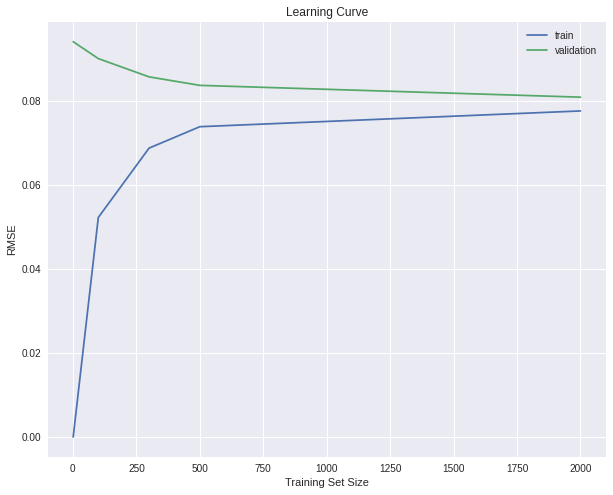

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# overfitting
decision_tree = DecisionTreeRegressor()

train_sizes, train_scores, test_scores = learning_curve(
    estimator=decision_tree,
    X=X_train,
    y=Y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 100, 300, 500, 2000]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

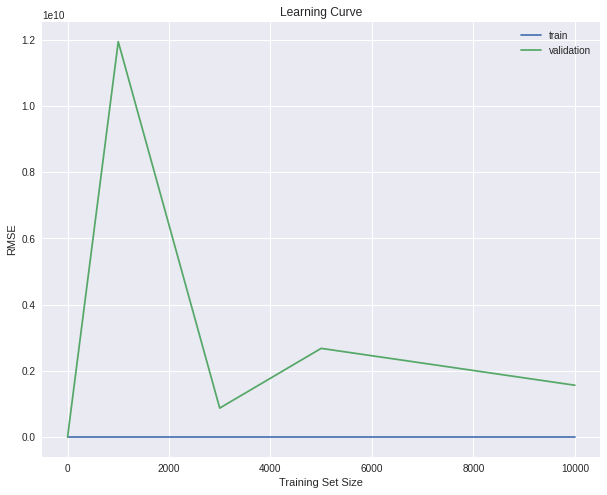

In [ ]:
# Underfitting
LR = LinearRegression()
LR_multi = MultiOutputRegressor(LR)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=LR_multi,
    X=X_train,
    y=Y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 1000, 3000, 5000, 10000]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

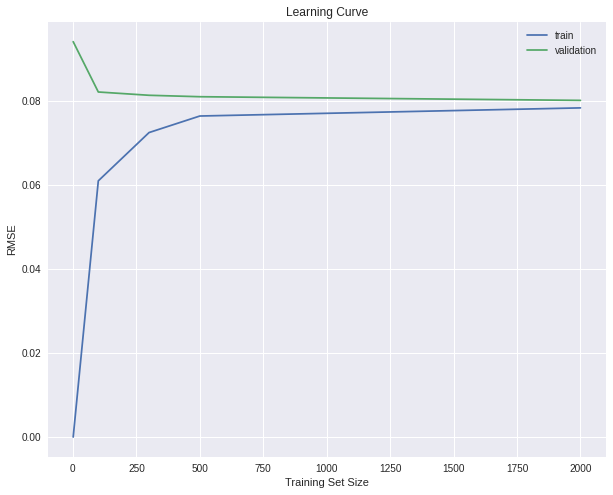

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# better
random_forest = RandomForestRegressor(max_depth=3)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=random_forest,
    X=X_train,
    y=Y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 100, 300, 500, 2000]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train, Y_train);
y_val_prediction = rf.predict(X_val)

In [ ]:
print("MSE is:", mean_squared_error(Y_val, y_val_prediction))

MSE is: 0.00634207899272273


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

gbr = GradientBoostingRegressor()
mor = MultiOutputRegressor(gbr)
mor.fit(X_train, Y_train)
pred = mor.predict(X_val)

In [ ]:
print("MSE is:", mean_squared_error(Y_val, pred))

MSE is: 0.006342629396006468


In [ ]:
y_val_prediction_trasnformed = pd.DataFrame(y_val_prediction, columns = ['Latitude Pred','Longitude Pred'])
y_val_prediction_trasnformed.head(5)
horizontal_concat = pd.concat([y_val_prediction_trasnformed.reset_index(drop=True), Y_val.reset_index(drop=True)], axis=1)
horizontal_concat

,Latitude Pred,Longitude Pred,Latitude,Longitude
0,40.726286,-73.906157,40.683464,-73.955033
1,40.705720,-73.962005,40.747691,-73.908433
2,40.702520,-73.954701,40.742409,-73.921699
3,40.726641,-73.908588,40.659414,-73.892872
4,40.705720,-73.962005,40.762964,-73.993515
...,...,...,...,...
769615,40.759109,-73.914814,40.847718,-73.937977
769616,40.729921,-73.910839,40.807085,-73.943831
769617,40.782916,-73.916375,40.837324,-73.919831
769618,40.725980,-73.911140,40.693342,-73.947352


In [ ]:
horizontal_concat['Result'] = pd.Series(dtype='int')

for i in range(769619):
  horizontal_concat['Result'][i] = haversine(horizontal_concat['Latitude Pred'][i], horizontal_concat['Latitude Pred'][i], horizontal_concat['Latitude'][i], horizontal_concat['Latitude'][i])

print(horizontal_concat['Result'].mean())

5.970773411420661


**Learning Curves**

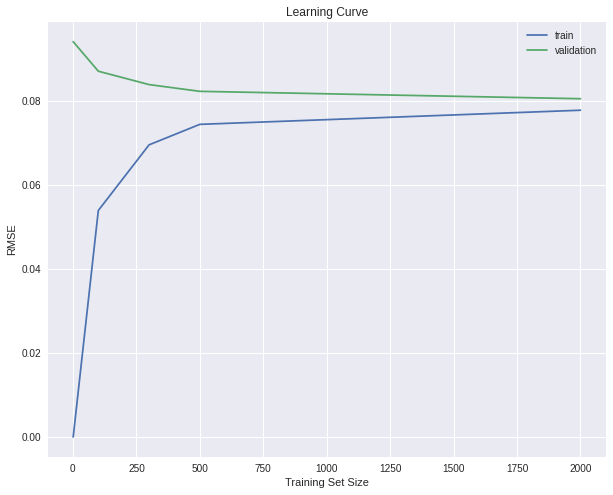

In [ ]:
# better
gbr = GradientBoostingRegressor()
mor = MultiOutputRegressor(gbr)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=mor,
    X=X_train,
    y=Y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 100, 300, 500, 2000]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

**XGBoost**

In [ ]:
# from xgboost import XGBRegressor
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold

# xg_reg = XGBRegressor()
# xg_reg_multi = MultiOutputRegressor(xg_reg)
# xg_reg_multi.fit(X_train, Y_train)

# kfold = KFold(n_splits=10, random_state=7)
# results = cross_val_score(xg_reg, X_train, Y_train, cv=kfold)
# y_val_pred = xg_reg.predict(X_val)

# mse = mean_squared_error(y_val_pred, Y_val)
# print("MSE is:", mse)

**Support Vector Regression**

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVR

# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X_train)
# y = sc_y.fit_transform(Y_train)
# X_val = sc_X.fit_transform(X_val)

# # Fitting SVR to the dataset
# regressor = SVR(kernel = 'rbf')
# multi_regressor = MultiOutputRegressor(regressor)
# multi_regressor.fit(X, y)

# y_pred = regressor.predict(X_val)
# y_pred = sc_y.inverse_transform(y_pred) 

In [ ]:
# from sklearn import neighbors

# model = neighbors.KNeighborsRegressor(n_neighbors = 1)
# model.fit(X_train, Y_train)
# pred=model.predict(X_train)
# error = sqrt(mean_squared_error(Y_val,pred)) 
# print('RMSE value is:', error)

In [ ]:
!pip freeze > requirements.txt